In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('./ex1data1.csv', delimiter=',')

data[1:10, :]

array([[ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233],
       [ 8.3829, 11.886 ],
       [ 7.4764,  4.3483],
       [ 8.5781, 12.    ],
       [ 6.4862,  6.5987],
       [ 5.0546,  3.8166]])

In [4]:
X = data[:, 0]
y = data[:, 1]

m = len(X)

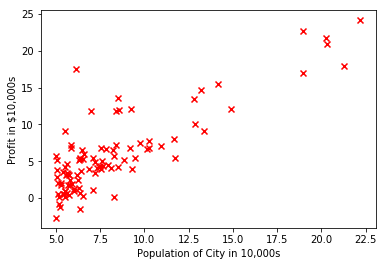

In [5]:
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.scatter(X, y, marker="x", c="red")

plt.show()

In [6]:
X0 = np.ones((m, 1))
X = np.column_stack((X0, X))
X[1:10, :]

array([[1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [7]:
init_theta = np.zeros((X.shape[1], 1))
init_theta

array([[0.],
       [0.]])

In [8]:
y = y.reshape((-1, 1))
# Also can use np.array([y]) which will make array as (1, 97) size. So while subtracting we will use y.T.
y[0:9, :]

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233],
       [11.886 ],
       [ 4.3483],
       [12.    ],
       [ 6.5987]])

In [9]:
# Computing cost function
def compute_cost(i, o, theta):
    predictions = np.dot(i, theta)
    sqr_err = np.subtract(predictions, o) ** 2
    cost = sum(sqr_err) / (2 * m)
    return cost

In [10]:
J1 = compute_cost(X, y, init_theta)
J1

array([32.07273388])

In [11]:
J2 = compute_cost(X, y, [[-1], [2]])
J2

array([54.24245508])

In [12]:
# Computing gradient descent
def compute_gradient_descent(i, o, theta, alpha, num_iters):
    for iter in range(num_iters):
        predict = np.dot(i, theta)
        pred_err = np.subtract(predict, o)
        gradient = np.dot(i.T, pred_err) / m
        theta = theta - alpha * gradient

    return theta

In [13]:
iterations = 1500
alpha = 0.01

final_theta = compute_gradient_descent(X, y, init_theta, alpha, iterations)

final_theta

array([[-3.63029144],
       [ 1.16636235]])

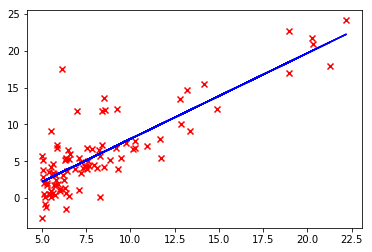

In [14]:
plt.scatter(X[:, 1], y, marker="x", c="red")
plt.plot(X[:, 1], np.dot(X, final_theta), c="blue")

plt.show()

In [15]:
np.dot([1, 3.5], final_theta) * 10000

array([4519.7678677])

In [16]:
np.dot([1, 7], final_theta) * 10000

array([45342.45012945])

In [17]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [18]:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [[theta0_vals[i]], [theta1_vals[j]]]
        J_vals[i, j] = compute_cost(X, y, t)
        
        
J_vals = J_vals.T

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(theta0_vals, theta1_vals, J_vals)
ax.set_title('Surface plot')
plt.show()

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>